Question 1 solution

In [16]:
#Question 1 solution
def word_count(sent):
    sent=sent.lower()
    sent=sent.split()
    dic ={}
    temp=0

    for i in sent:
        if i not in dic:
           dic[i]=1
        else:
           dic[i]+=1

    for i in dic:
        if(temp < dic[i]):
          temp = dic[i]

    for j in dic:
        if dic[j] == temp:      
           print(f'The highest occuring word is {j},and the length is {len(j)}')
    
word_count("write write from 1 to 100 write further")

The highest occuring word is write,and the length is 5


Question 2 solution

In [14]:
#Question 2 solution
def char_freq(s):
    flag=1
    d={}
    for i in s:
        if i not in d:
          d[i]=1
        else:
          d[i]+=1
    for j in d:
      for k in d:
        if d[j] != d[k]:
           flag=0
           break
        
    return flag
s1='abcdd' 
s='abcd'

print(char_freq(s))
print(char_freq(s1))

1
0


Question 4 solutions

In [ ]:
#Question 4 solutions
import requests
import csv

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to download data. Error code: {response.status_code}")
        return None

def convert_to_csv(data, filename):
    if data is None:
        return

    # Extracting the keys from the first record to use as column headers
    headers = data[0].keys()

    with open(filename, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=headers)
        writer.writeheader()
        writer.writerows(data)

    print(f"Data saved successfully as {filename}")

# Main program
url = "https://data.nasa.gov/resource/y77d-th95.json"
filename = "nasa_data.csv"

# Download the data
nasa_data = download_data(url)

# Convert and save as CSV
convert_to_csv(nasa_data, filename)


Question 5 solution

In [5]:
# Question 5 solution
import requests

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to download data. Error code: {response.status_code}")
        return None

def extract_data(data):
    if data is None:
        return

    # Extract show information
    show_id = data['id']
    show_url = data['url']
    show_name = data['name']

    # Extract episode information
    episodes = data['_embedded']['episodes']
    episode_data = []
    for episode in episodes:
        episode_number = episode['season']
        episode_number = episode['number']
        episode_type = episode['type']
        airdate = episode['airdate']
        airtime = episode['airtime']
        runtime = episode['runtime']
        average_rating = episode['rating']['average']
        summary = episode['summary']
        medium_image = episode['image']['medium']
        original_image = episode['image']['original']

        # Remove HTML tags from the summary
        summary = remove_html_tags(summary)

        # Format airdate and airtime
        formatted_airdate = format_date(airdate)
        formatted_airtime = format_time(airtime)

        # Append the formatted episode data to the list
        episode_data.append({
            'id': show_id,
            'url': show_url,
            'name': show_name,
            'season': episode_number,
            'number': episode_number,
            'type': episode_type,
            'airdate': formatted_airdate,
            'airtime': formatted_airtime,
            'runtime': runtime,
            'average rating': average_rating,
            'summary': summary,
            'medium image link': medium_image,
            'original image link': original_image
        })

    return episode_data

def remove_html_tags(text):
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def format_date(date):
    from datetime import datetime
    if date:
        formatted_date = datetime.strptime(date, '%Y-%m-%d').strftime('%Y-%m-%d')
        return formatted_date
    else:
        return ''

def format_time(time):
    if time:
        formatted_time = time[:-3]
        return formatted_time
    else:
        return ''

# Main program
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Download the data
data = download_data(url)

# Extract and display the formatted data
formatted_data = extract_data(data)
if formatted_data:
    for episode in formatted_data:
        print("Episode Details:")
        print(f"Show ID: {episode['id']}")
        print(f"Show URL: {episode['url']}")
        print(f"Show Name: {episode['name']}")
        print(f"Season: {episode['season']}")
        print(f"Episode Number: {episode['number']}")
        print(f"Type: {episode['type']}")
        print(f"Airdate: {episode['airdate']}")
        print(f"Airtime: {episode['airtime']}")
        print(f"Runtime: {episode['runtime']} minutes")
        print(f"Average Rating: {episode['average rating']}")
        print(f"Summary: {episode['summary']}")
        print(f"Medium Image Link: {episode['medium image link']}")
        print(f"Original Image Link: {episode['original image link']}")
        print("----------------------")
else:
    print("No data available.")


Episode Details:
Show ID: 1371
Show URL: https://www.tvmaze.com/shows/1371/westworld
Show Name: Westworld
Season: 1
Episode Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21
Runtime: 68 minutes
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg
----------------------
Episode Details:
Show ID: 1371
Show URL: https://www.tvmaze.com/shows/1371/westworld
Show Name: Westworld
Season: 2
Episode Number: 2
Type: regular
Airdate: 2016-10-09
Airtime: 21
Runtime: 60 minutes
Average Rating: 7.7
Summary: Bernard suspec

Question 7 solution

In [ ]:
#Question 7 solution
import requests
import csv

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to download data. Error code: {response.status_code}")
        return None

def convert_to_csv(data, filename):
    if data is None:
        return

    # Define the desired output data attributes
    output_attributes = ['name', 'id', 'nametype', 'recclass', 'mass (g)', 'year', 'reclat', 'reclong', 'coordinates']

    with open(filename, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=output_attributes)
        writer.writeheader()
        for record in data:
            # Extract relevant information from each record
            name = record['name']
            id = record['id']
            nametype = record['nametype']
            recclass = record['recclass']
            mass = record['mass (g)']
            year = record['year']
            reclat = record['reclat']
            reclong = record['reclong']
            coordinates = record['geolocation']['coordinates']

            # Write the extracted data as a row in the CSV file
            writer.writerow({
                'name': name,
                'id': id,
                'nametype': nametype,
                'recclass': recclass,
                'mass (g)': mass,
                'year': year,
                'reclat': reclat,
                'reclong': reclong,
                'coordinates': coordinates
            })

    print(f"Data saved successfully as {filename}")

# Main program
url = "https://data.nasa.gov/resource/y77d-th95.json"
filename = "nasa_data.csv"

# Download the data
nasa_data = download_data(url)

# Convert and save as CSV
convert_to_csv(nasa_data, filename)


Question 8 solution

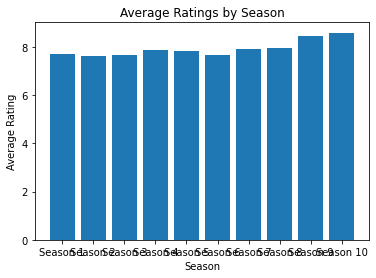

Episodes with Average Ratings above 8:
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld

Episodes Aired Before May 2019:
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld

Highest Rated Episodes by Season:
Season 1: Westworld (Rating: 8)
Season 2: Westworld (Rating: 7.8)
Season 3: Westworld (Rating: 7.8)
Season 4: Westworld (Rating: 8)
Season 5: Westworld (Rating: 8)
Season 6: Westworld (Rating: 8)
Season 7: Westworld (Rating: 8.6)
Season 8: Westworld (Rating: 8.7)
Season 9: Westworld (Rating: 8.5)
Season 10: Westworld (Rating: 8.7)

Lowest Rated Episodes by Season:
Season 1: Westworld (Rating: 7.1)
Season 2: Westworld (Rating: 7.4)
Season 3: Westworld (Rating: 7.6)
Season 4: Westworld (Rating: 7.7)
Season 5: Westworld (Rating: 7.6)
Season 6: Westworld (Rating: 7.5)
Season 7: Westworld (Rating: 7.5)
Season 8: Westworld (Rating:

In [6]:
# Question 8 solution
import requests
import matplotlib.pyplot as plt

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to download data. Error code: {response.status_code}")
        return None

def extract_data(data):
    if data is None:
        return

    # Extract show information
    show_id = data['id']
    show_url = data['url']
    show_name = data['name']

    # Extract episode information
    episodes = data['_embedded']['episodes']
    episode_data = []
    for episode in episodes:
        episode_number = episode['season']
        episode_number = episode['number']
        episode_type = episode['type']
        airdate = episode['airdate']
        airtime = episode['airtime']
        runtime = episode['runtime']
        average_rating = episode['rating']['average']
        summary = episode['summary']
        medium_image = episode['image']['medium']
        original_image = episode['image']['original']

        # Remove HTML tags from the summary
        summary = remove_html_tags(summary)

        # Format airdate and airtime
        formatted_airdate = format_date(airdate)
        formatted_airtime = format_time(airtime)

        # Append the formatted episode data to the list
        episode_data.append({
            'id': show_id,
            'url': show_url,
            'name': show_name,
            'season': episode_number,
            'number': episode_number,
            'type': episode_type,
            'airdate': formatted_airdate,
            'airtime': formatted_airtime,
            'runtime': runtime,
            'average rating': average_rating,
            'summary': summary,
            'medium image link': medium_image,
            'original image link': original_image
        })

    return episode_data

def remove_html_tags(text):
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def format_date(date):
    from datetime import datetime
    if date:
        formatted_date = datetime.strptime(date, '%Y-%m-%d').strftime('%Y-%m-%d')
        return formatted_date
    else:
        return ''

def format_time(time):
    if time:
        formatted_time = time[:-3]
        return formatted_time
    else:
        return ''

def plot_season_ratings(episode_data):
    season_ratings = {}
    for episode in episode_data:
        season = episode['season']
        rating = episode['average rating']

        if season in season_ratings:
            season_ratings[season].append(rating)
        else:
            season_ratings[season] = [rating]

    seasons = []
    ratings = []
    for season, season_rating in season_ratings.items():
        seasons.append(f"Season {season}")
        ratings.append(sum(season_rating) / len(season_rating))

    plt.bar(seasons, ratings)
    plt.xlabel('Season')
    plt.ylabel('Average Rating')
    plt.title('Average Ratings by Season')
    plt.show()

def get_highly_rated_episodes(episode_data):
    highly_rated_episodes = []
    for episode in episode_data:
        if episode['average rating'] > 8:
            highly_rated_episodes.append(episode['name'])

    return highly_rated_episodes

def get_episodes_before_date(episode_data, date):
    episodes_before_date = []
    for episode in episode_data:
        if episode['airdate'] < date:
            episodes_before_date.append(episode['name'])

    return episodes_before_date

def get_highest_lowest_rated_episodes_by_season(episode_data):
    highest_rated_episodes = {}
    lowest_rated_episodes = {}
    for episode in episode_data:
        season = episode['season']
        rating = episode['average rating']
        episode_name = episode['name']

        if season in highest_rated_episodes:
            if rating > highest_rated_episodes[season]['rating']:
                highest_rated_episodes[season] = {'name': episode_name, 'rating': rating}
        else:
            highest_rated_episodes[season] = {'name': episode_name, 'rating': rating}

        if season in lowest_rated_episodes:
            if rating < lowest_rated_episodes[season]['rating']:
                lowest_rated_episodes[season] = {'name': episode_name, 'rating': rating}
        else:
            lowest_rated_episodes[season] = {'name': episode_name, 'rating': rating}

    return highest_rated_episodes, lowest_rated_episodes

def get_most_popular_episode_summary_by_season(episode_data):
    most_popular_episodes = {}
    for episode in episode_data:
        season = episode['season']
        rating = episode['average rating']
        episode_name = episode['name']
        summary = episode['summary']

        if season in most_popular_episodes:
            if rating > most_popular_episodes[season]['rating']:
                most_popular_episodes[season] = {'name': episode_name, 'rating': rating, 'summary': summary}
        else:
            most_popular_episodes[season] = {'name': episode_name, 'rating': rating, 'summary': summary}

    return most_popular_episodes

# Main program
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Download the data
data = download_data(url)

# Extract data
episode_data = extract_data(data)

# Plot average ratings by season
plot_season_ratings(episode_data)

# Get episodes with average ratings above 8
highly_rated_episodes = get_highly_rated_episodes(episode_data)
print("Episodes with Average Ratings above 8:")
for episode in highly_rated_episodes:
    print(episode)
print()

# Get episodes aired before May 2019
episodes_before_date = get_episodes_before_date(episode_data, '2019-05-01')
print("Episodes Aired Before May 2019:")
for episode in episodes_before_date:
    print(episode)
print()

# Get highest and lowest rated episodes by season
highest_rated_episodes, lowest_rated_episodes = get_highest_lowest_rated_episodes_by_season(episode_data)
print("Highest Rated Episodes by Season:")
for season, episode in highest_rated_episodes.items():
    print(f"Season {season}: {episode['name']} (Rating: {episode['rating']})")
print()
print("Lowest Rated Episodes by Season:")
for season, episode in lowest_rated_episodes.items():
    print(f"Season {season}: {episode['name']} (Rating: {episode['rating']})")
print()

# Get summary for the most popular episode in each season
most_popular_episodes = get_most_popular_episode_summary_by_season(episode_data)
print("Summary for Most Popular Episodes by Season:")
for season, episode in most_popular_episodes.items():
    print(f"Season {season}: {episode['name']} (Rating: {episode['rating']})")
    print(f"Summary: {episode['summary']}")
    print()


Questtion 9 Solution

In [ ]:
#Question 9 Solution
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
#non_qualifying_cars = data[data['Qualifies for Clean Alternative Fuel Vehicle'] == 'N'][['Make', 'Model Type']]
#print("Cars and Types that do not qualify for clean alternative fuel vehicle:")
#print(non_qualifying_cars)
#print()

# Get all TESLA cars with the model year and model type made in Bothell City
tesla_cars_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'Bothell')][['Model Year', 'Model Type']]
print("TESLA cars with model year and model type made in Bothell City:")
print(tesla_cars_bothell)
print()

# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars_100_miles = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]
print("Cars with electric range of more than 100 and made after 2015:")
print(electric_cars_100_miles)
print()

# Draw plots to show the distribution between city and electric vehicle type
city_electric_type_counts = data.groupby(['City', 'Electric Vehicle Type']).size().unstack()
city_electric_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of City and Electric Vehicle Type')
plt.legend(title='Electric Vehicle Type')
plt.show()


Question 10 Solution

In [ ]:
#Question 10 Solution
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from collections import defaultdict

def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Perform part-of-speech tagging
    tagged_words = pos_tag(words)

    # Initialize counts dictionary
    counts = defaultdict(int)

    # Count the occurrences of each part of speech
    for word, tag in tagged_words:
        if tag.startswith('VB'):  # Verbs
            counts['verbs'] += 1
        elif tag.startswith('NN'):  # Nouns
            counts['nouns'] += 1
        elif tag.startswith('PRP'):  # Pronouns
            counts['pronouns'] += 1
        elif tag.startswith('JJ'):  # Adjectives
            counts['adjectives'] += 1

    return dict(counts)

# Example usage
text = "The quick brown fox jumps over the lazy dog."
pos_counts = count_pos_tags(text)
print(pos_counts)
